### Authors:

Marek Szydłowski 136633<br>
Wojciech Tomczak 145467

Link to the source code: https://github.com/Vosloo/evolutionary-computation-labs

In [1]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd

from multiprocessing import Pool
import pickle

from IPython.display import display, Markdown

In [2]:
module_path = Path.cwd().parent
if module_path not in sys.path:
    sys.path.append(str(module_path))

In [3]:
from src.tsp_problem import TSPProblem
from src.algorithms.methods import Method
from src.visualization import Visualizer

In [4]:
problem = TSPProblem(no_runs=200)


Loaded 4 instances: TSPA, TSPB, TSPC, TSPD
Available methods: ['RANDOM', 'NEAREST', 'GREEDY_CYCLE', 'GREEDY_REGRET', 'GREEDY_REGRET_WEIGHTED', 'LOCAL_SEARCH_STEEPEST_NODES_RANDOM', 'LOCAL_SEARCH_STEEPEST_NODES_HEURISTIC', 'LOCAL_SEARCH_STEEPEST_EDGES_RANDOM', 'LOCAL_SEARCH_STEEPEST_EDGES_HEURISTIC', 'LOCAL_SEARCH_GREEDY_NODES_RANDOM', 'LOCAL_SEARCH_GREEDY_NODES_HEURISTIC', 'LOCAL_SEARCH_GREEDY_EDGES_RANDOM', 'LOCAL_SEARCH_GREEDY_EDGES_HEURISTIC', 'LOCAL_SEARCH_CANDIDATES_RANDOM', 'LOCAL_SEARCH_CANDIDATES_HEURISTIC', 'LOCAL_SEARCH_MOVES_RANDOM']


In [5]:
grades = problem.run(
    ["TSPC", "TSPD"],
    [
        Method.RANDOM,
        Method.LOCAL_SEARCH_MOVES_RANDOM,
    ],
)



Running TSPC instance
Running RANDOM method for 200 runs
Finished RANDOM method in 0.28s
Running LOCAL_SEARCH_MOVES_RANDOM method for 200 runs
Finished LOCAL_SEARCH_MOVES_RANDOM method in 119.39s


In [6]:
for instance_name, instance_grades in grades.items():
    print(f"\n{instance_name}:")
    print("----")
    for method_name, grade in instance_grades.items():
        meth_name = method_name.value.replace("_", " ").title()
        print(f"{meth_name}: {grade}")


TSPC:
----
Random: 
==================================== Grade =====================================
Method:                                 Random
Best run id:                            40
Best run cost:                          49885
Best run distance:                      139921
Best run score:                         189806
Min score:                              189806
Avg score:                              215512
Max score:                              237264

Local Search Moves Random: 
==================================== Grade =====================================
Method:                                 Local Search Moves Random
Best run id:                            135
Best run cost:                          41028
Best run distance:                      24944
Best run score:                         65972
Min score:                              65972
Avg score:                              65972
Max score:                              65972



In [8]:
nodes = {
    instance_name: problem._get_nodes(instance)
    for instance_name, instance in problem.instances.items()
    if instance_name in ("TSPC", "TSPD")
}
visualizer = Visualizer(nodes)


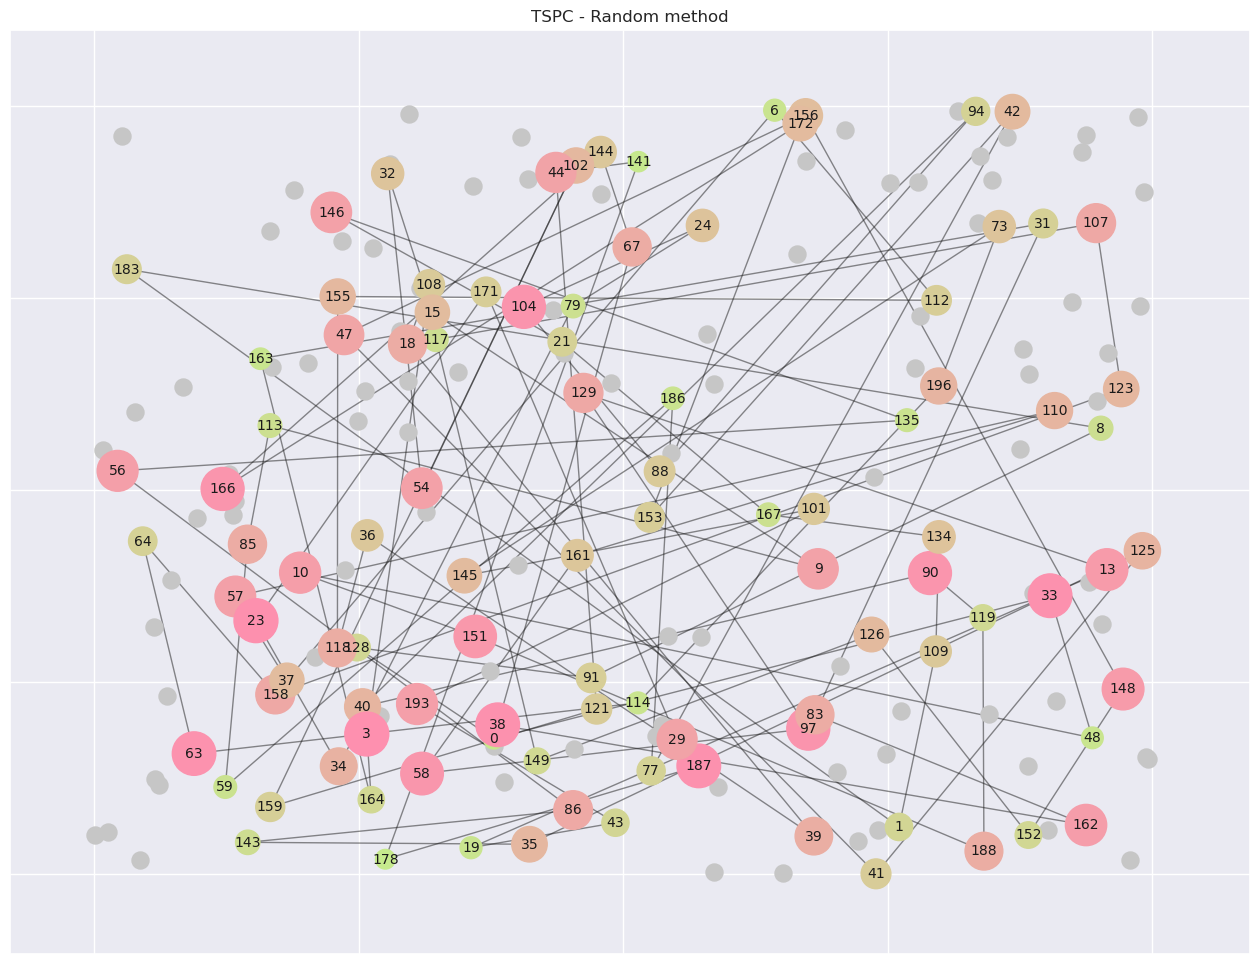

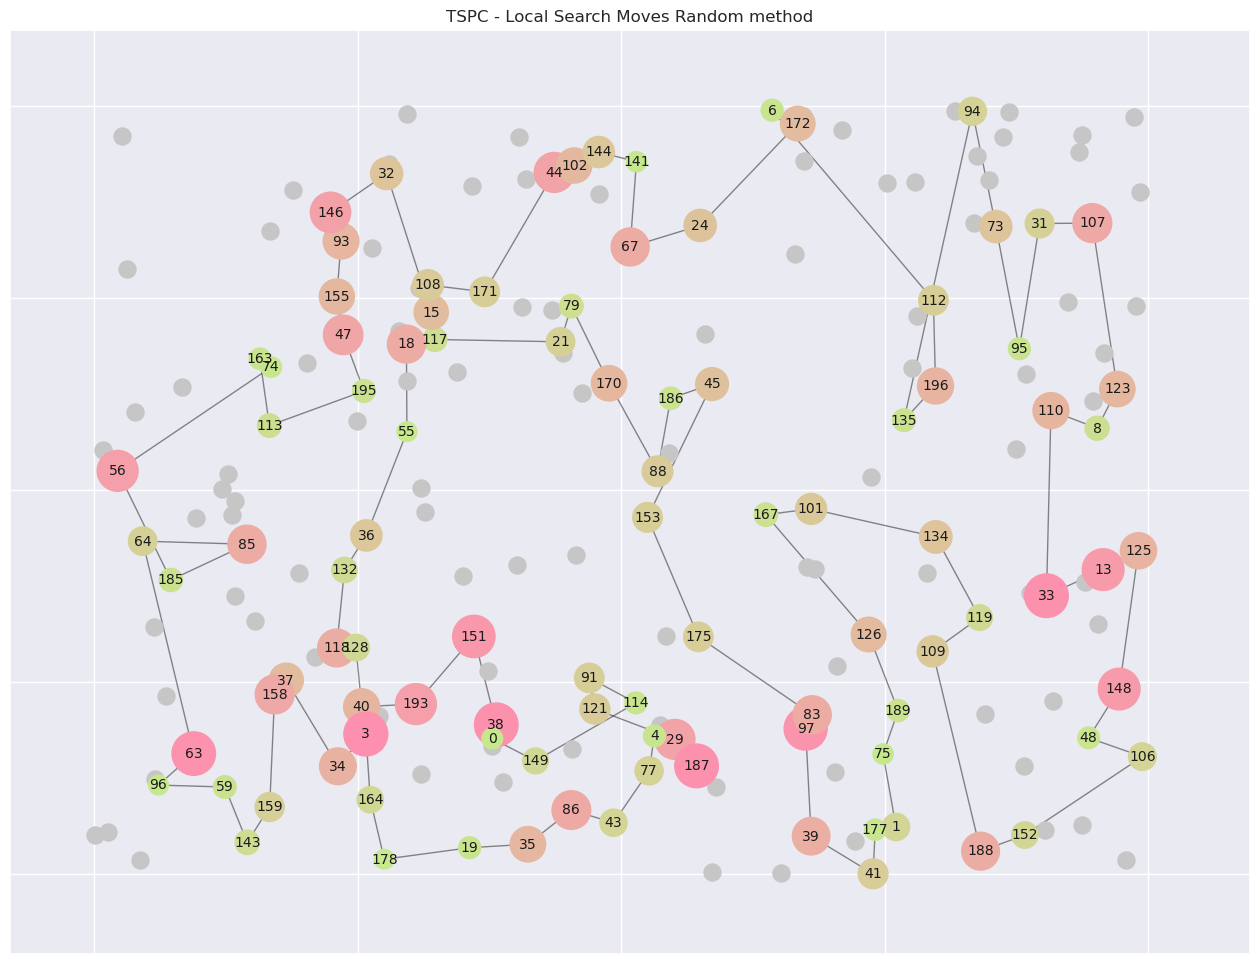

In [9]:
for instance_name, instance_grades in grades.items():
    for method_name, grade in instance_grades.items():
        visualizer.visualise_solution(grade, instance_name, method_name)